# App activity

## Initialization

In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
from utils import read_app_activity

df = read_app_activity('../data/samples/APP_ACTIVITY_SAMPLE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882319 entries, 0 to 882318
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   client_id      882319 non-null  uint64        
 1   device_id      882319 non-null  uint64        
 2   activity_date  882319 non-null  datetime64[ns]
 3   cat_c3         882114 non-null  Int32         
 4   cat_c4         874982 non-null  Int32         
 5   cat_c5         882314 non-null  Int32         
 6   cat_c6         882319 non-null  Int32         
 7   cat_c8         878771 non-null  Int8          
 8   cat_c9         879644 non-null  Int32         
 9   cat_c10        879759 non-null  Int8          
 10  float_c11      879759 non-null  float32       
 11  float_c12      879759 non-null  float32       
 12  float_c13      189194 non-null  float32       
 13  float_c14      879759 non-null  float32       
 14  float_c15      523683 non-null  float32       
 15  

In [3]:
# Preprocess
from utils import preprocess_app_activity_data

df = preprocess_app_activity_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878373 entries, 0 to 882318
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   client_id      878373 non-null  uint64        
 1   device_id      878373 non-null  uint64        
 2   activity_date  878373 non-null  datetime64[ns]
 3   cat_c3         878373 non-null  int32         
 4   cat_c4         878373 non-null  int32         
 5   cat_c5         878373 non-null  int32         
 6   cat_c6         878373 non-null  int32         
 7   cat_c8         878373 non-null  int8          
 8   cat_c9         878373 non-null  int32         
 9   cat_c10        878373 non-null  int8          
 10  float_c11      878373 non-null  float32       
 11  float_c12      878373 non-null  float32       
 12  float_c14      878373 non-null  float32       
dtypes: datetime64[ns](1), float32(3), int32(5), int8(2), uint64(2)
memory usage: 55.3 MB


In [4]:
df.head()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c14
0,4130085634078954,16077501765116789483,2025-04-29,21,1,3,1,1,2,0,8.000,55.000,0.500
1,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
2,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
3,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,55.000,0.300
4,4130085634078954,5058951474921818439,2025-06-28,21,1,3,1,1,2,0,37.000,50.000,0.300


In [5]:
df.describe()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c14
count,878373.000,878373.000,878373,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000,878373.000
mean,9571253373745823744.000,9231408809479630848.000,2025-04-15 20:31:14.860907264,20.883,1.027,3.008,2.181,0.868,1.402,0.628,37.813,55.007,0.892
min,4130085634078954.000,104983071147102.000,2024-12-01 00:00:00,1.000,1.000,3.000,1.000,0.000,1.000,0.000,-1.000,0.000,0.000
25%,5265600578563724288.000,4617571190849843200.000,2025-03-01 00:00:00,21.000,1.000,3.000,1.000,1.000,1.000,0.000,9.000,35.000,0.286
50%,9896623871746766848.000,9048332729640222720.000,2025-04-17 00:00:00,21.000,1.000,3.000,2.000,1.000,1.000,1.000,35.000,55.000,0.525
75%,13870888663844587520.000,13668502796394041344.000,2025-06-01 00:00:00,21.000,1.000,3.000,3.000,1.000,2.000,1.000,64.000,76.000,0.800
max,18440239832994052096.000,18444959085162446848.000,2025-08-31 00:00:00,21.000,8.000,13.000,8.000,1.000,2.000,1.000,97.000,100.000,16.059
std,5198907035237409792.000,5304615003601307648.000,NaN,1.227,0.197,0.191,1.503,0.339,0.490,0.483,29.025,26.381,1.849


In [6]:
print('Mean of app activities by client:')
df.groupby('client_id').size().mean()

Mean of app activities by client:


np.float64(490.43718592964825)

## Categorical data

In [7]:
cat_cols = ['cat_c3', 'cat_c4', 'cat_c5', 'cat_c6', 'cat_c9']

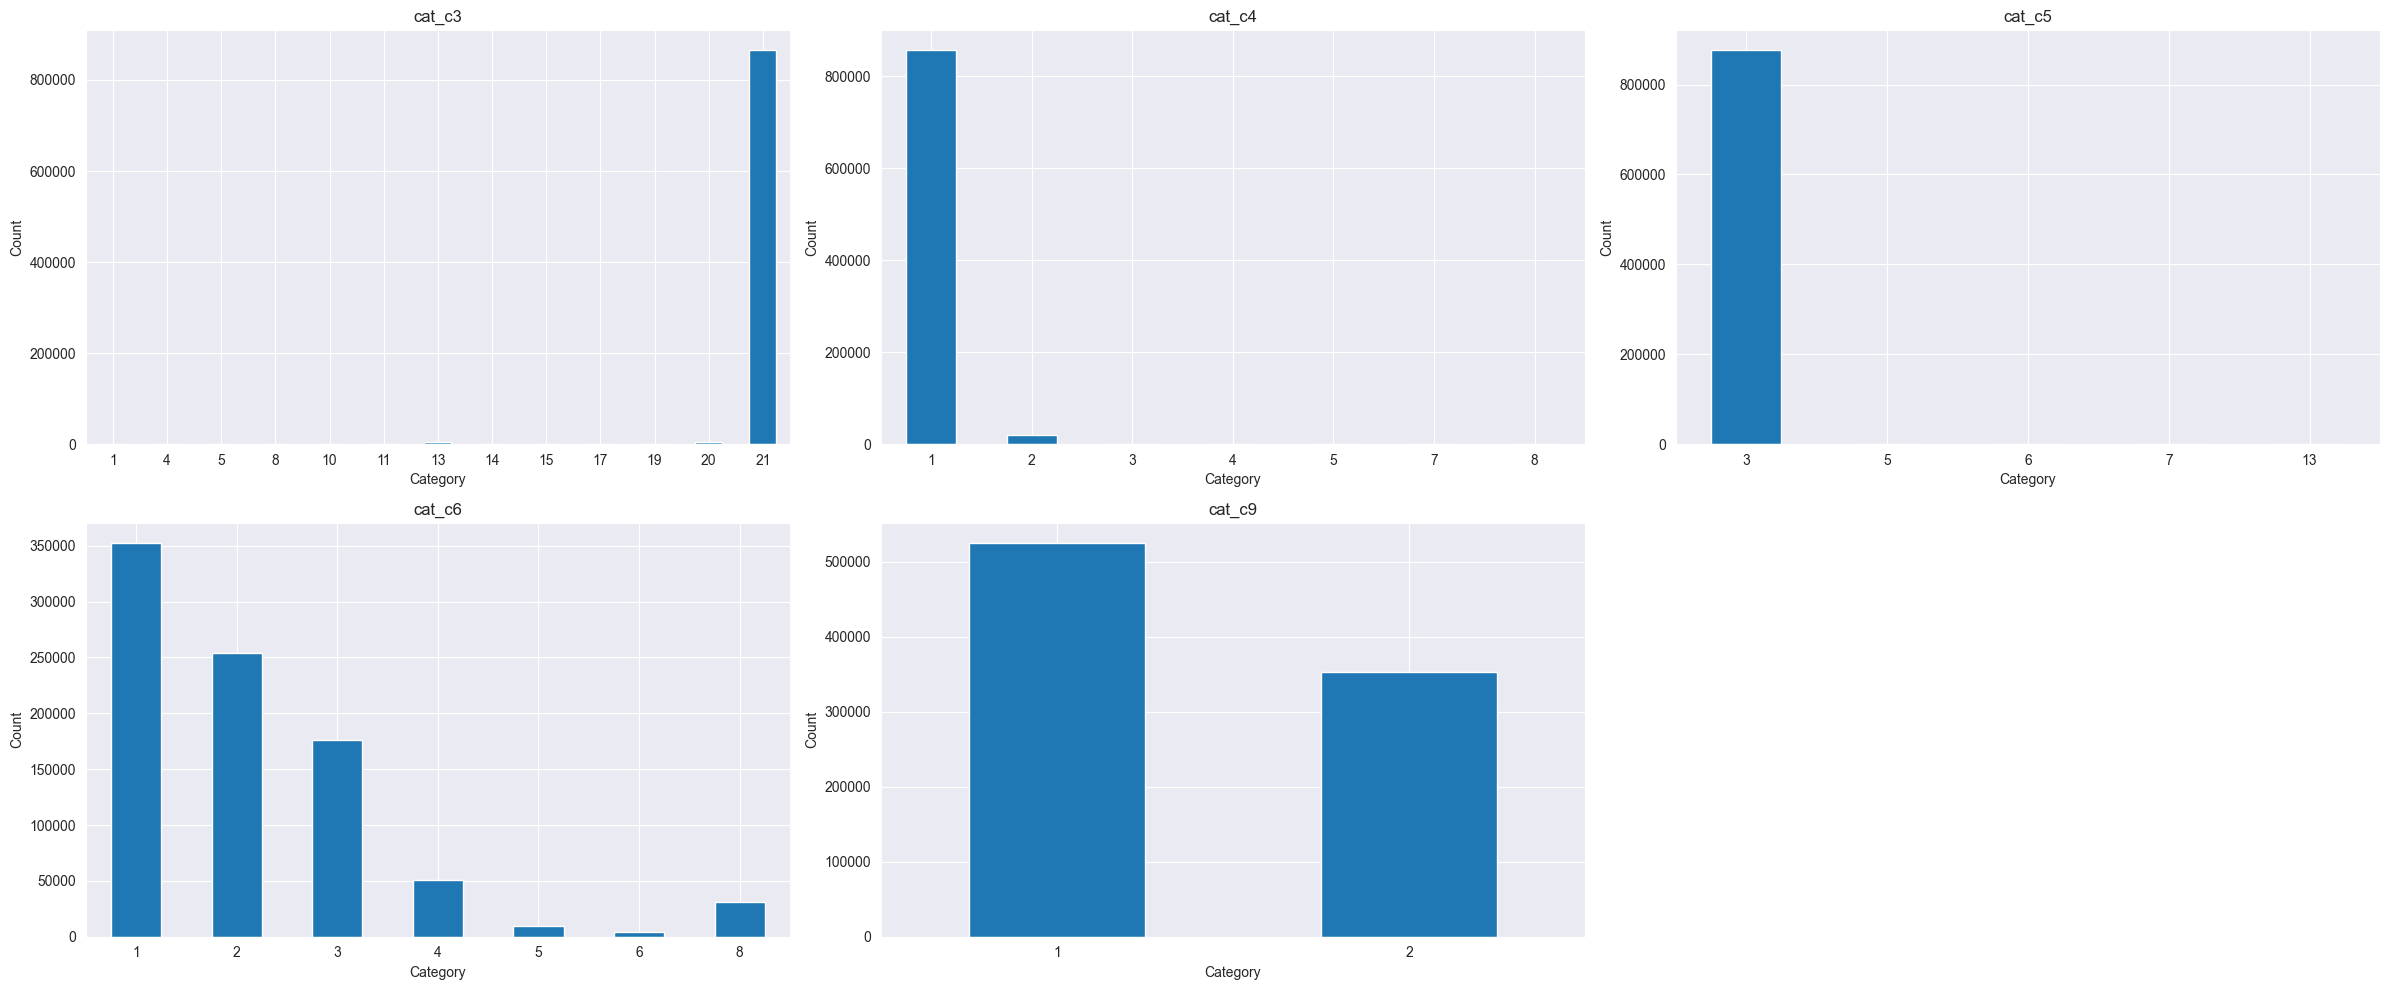

In [8]:
# Plots
from utils import plot_categorical_cols_distribution

plot_categorical_cols_distribution(df, cat_cols)

In [9]:
# Counts
for col in cat_cols:
    print(df[col].astype(int).value_counts().sort_index())

cat_c3
1       1340
4        841
5         61
8        625
10      1356
11        58
13      3877
14       112
15        25
17       238
19       267
20      4033
21    865540
Name: count, dtype: int64
cat_c4
1    857206
2     19734
3       738
4       227
5       362
7        75
8        31
Name: count, dtype: int64
cat_c5
3     876648
5         61
6        902
7        625
13       137
Name: count, dtype: int64
cat_c6
1    352797
2    253569
3    176004
4     50407
5      9878
6      4617
8     31101
Name: count, dtype: int64
cat_c9
1    525446
2    352927
Name: count, dtype: int64


## Continuous data

In [10]:
cont_cols = ['float_c11', 'float_c12', 'float_c14']

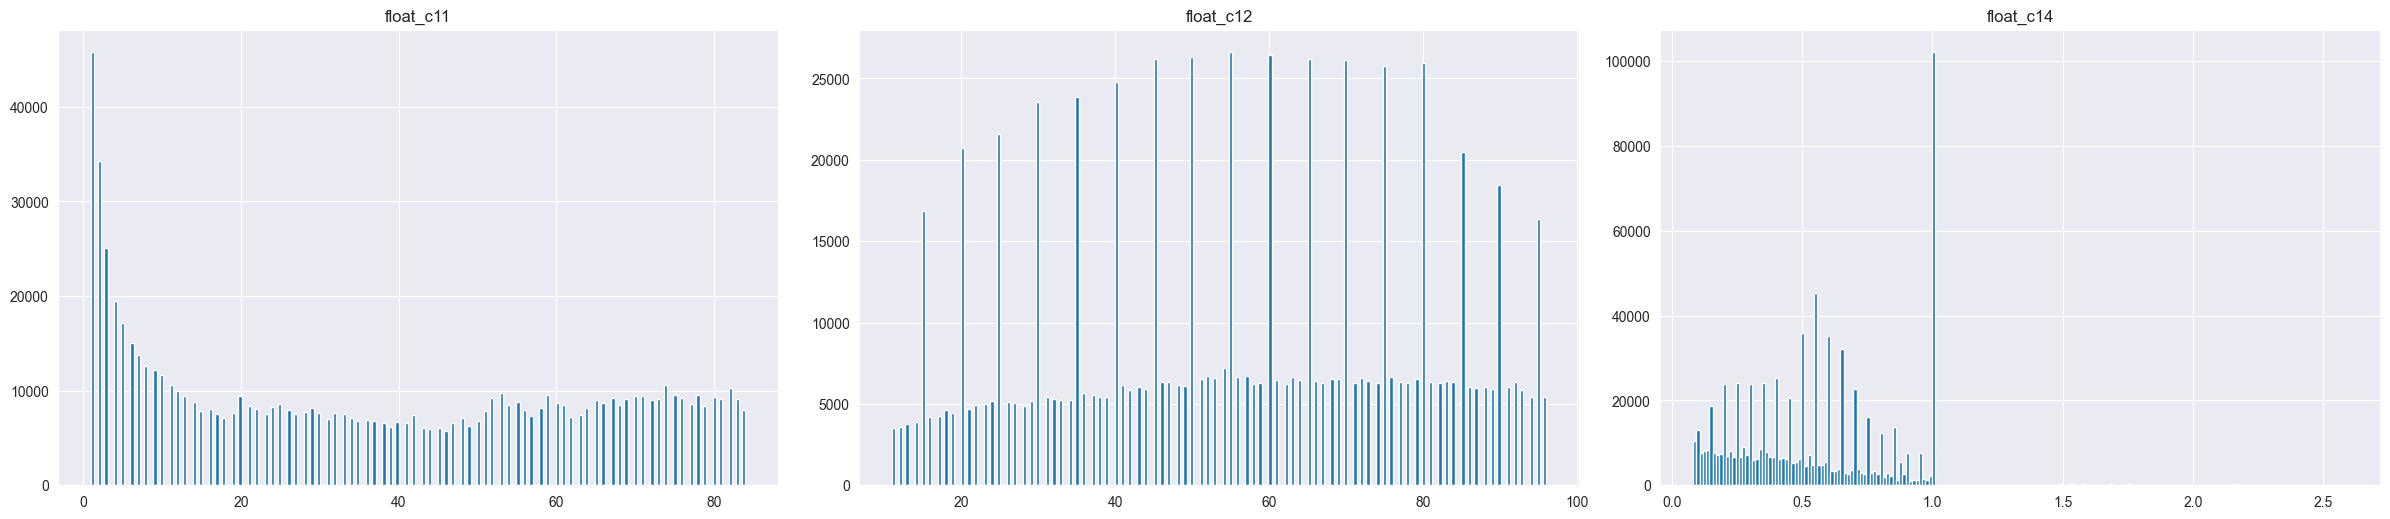

In [11]:
# Histograms
from utils import plot_continuous_cols_distribution

plot_continuous_cols_distribution(df, cont_cols)

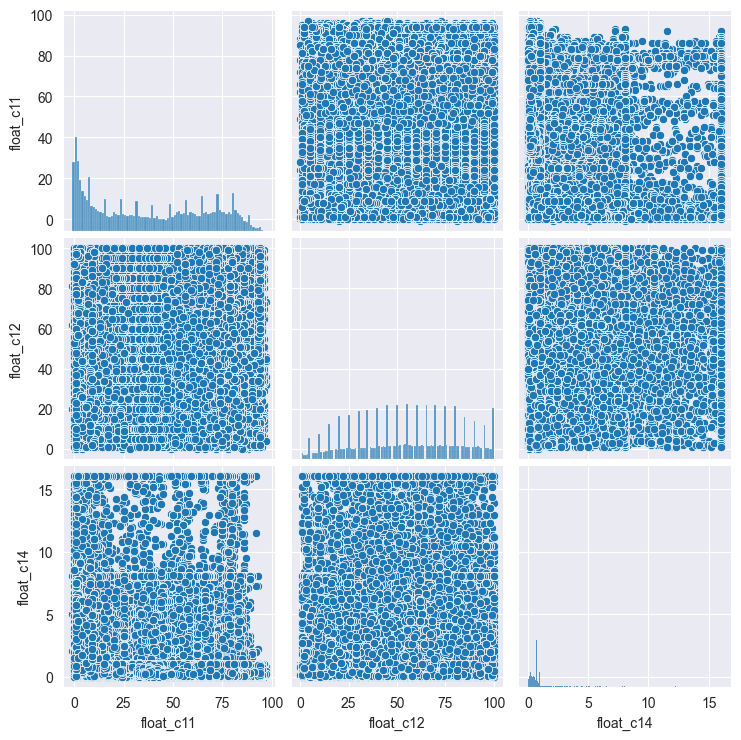

In [12]:
# Pairplot
sns.pairplot(df[cont_cols])

In [13]:
# Correlation matrix
df[cont_cols].corr()

,float_c11,float_c12,float_c14
float_c11,1.000,0.134,-0.053
float_c12,0.134,1.000,-0.011
float_c14,-0.053,-0.011,1.000
